# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
'''
units = "metric"
urlt = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"

response=requests.get(urlt).json()
print(json.dumps(response, indent=4,sort_keys=True))
'''

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 64.8,
        "lon": -147.5333
    },
    "dt": 1684791065,
    "id": 5879898,
    "main": {
        "feels_like": 7.94,
        "humidity": 75,
        "pressure": 1022,
        "temp": 9.79,
        "temp_max": 10.93,
        "temp_min": 8.17
    },
    "name": "Badger",
    "sys": {
        "country": "US",
        "id": 7684,
        "sunrise": 1684757030,
        "sunset": 1684827004,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 3.6
    }
}


In [12]:
'''
# Parse the JSON and retrieve data
city_weather = ["name"]

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = response["coord"]["lat"]
city_lng = response["coord"]["lon"]
city_max_temp = response["main"]["temp_max"]
city_humidity = response["main"]["humidity"]
city_clouds = response["clouds"]["all"]
city_wind = response["wind"]["speed"]
city_country =response["sys"]["country"]
city_date = response["dt"]
print(f"{city}, {city_country}, {city_lat}, {city_lng}, {city_max_temp}, {city_clouds}, {city_wind}")

print(f"The name is {city}")
'''

badger, US, 64.8, -147.5333, 10.93, 75, 3.6
The name is badger


In [46]:
#urlb = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"
#response=requests.get(url)
#response

<Response [200]>

In [15]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&units={units}&q={city}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response=requests.get(city_url).json()

    try:
       
        # Parse the JSON and retrieve data
        city = response["name"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | turabah
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | nagqu
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | walvis bay
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | labytnangi
Processing Record 11 of Set 1 | vielha
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | nuuk
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | northam
Processing Record 23 

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Blackmans Bay,-43.0167,147.3167,12.07,78,100,3.02,AU,1684791736
1,Turabah,21.2141,41.6331,27.58,33,32,1.72,SA,1684791983
2,Qaqortoq,60.7167,-46.0333,-0.47,97,100,10.70,GL,1684791984
3,Nagqu Prefecture,31.5000,92.0000,-1.96,34,14,1.33,CN,1684791856
4,Hermanus,-34.4187,19.2345,14.33,61,100,2.98,ZA,1684791984


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Blackmans Bay,-43.0167,147.3167,12.07,78,100,3.02,AU,1684791736
1,Turabah,21.2141,41.6331,27.58,33,32,1.72,SA,1684791983
2,Qaqortoq,60.7167,-46.0333,-0.47,97,100,10.70,GL,1684791984
3,Nagqu Prefecture,31.5000,92.0000,-1.96,34,14,1.33,CN,1684791856
4,Hermanus,-34.4187,19.2345,14.33,61,100,2.98,ZA,1684791984


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

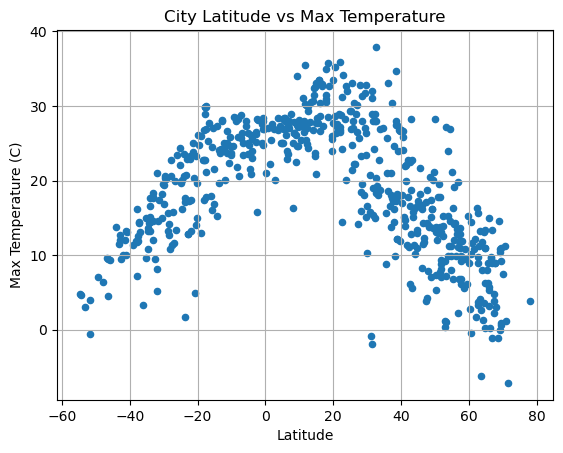

In [27]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

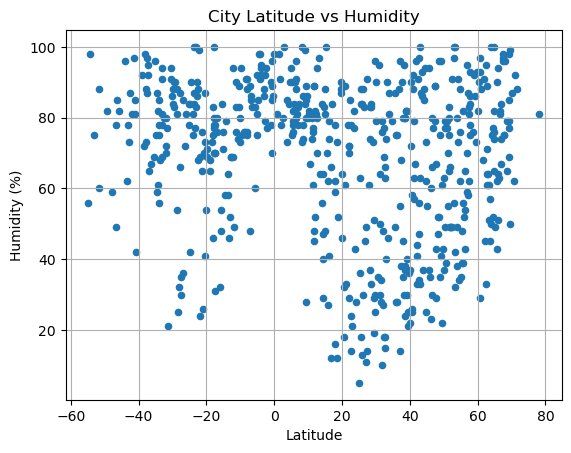

In [28]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

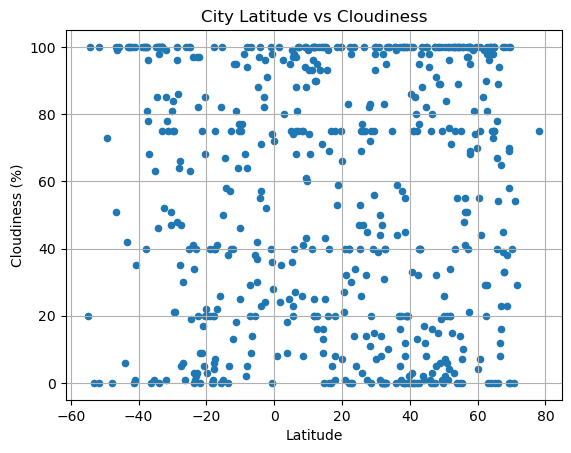

In [29]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

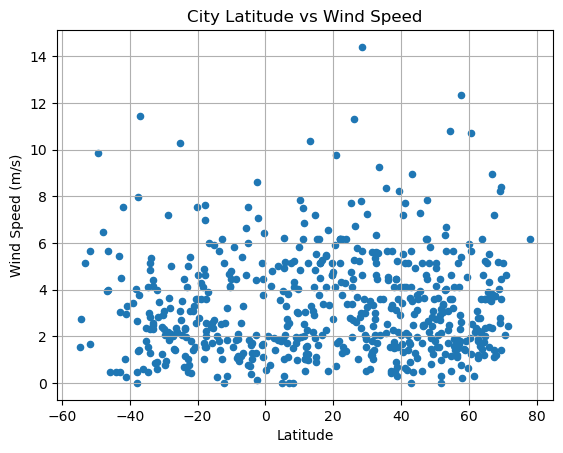

In [30]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
'''
x_value = 
y_value = 
(slope, intercept, r_value) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
'''

'\nx_value = \ny_value = \n(slope, intercept, r_value) = linregress(x_value, y_value)\nregress_values = x_value * slope + intercept\nline_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))\n'

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Turabah,21.2141,41.6331,27.58,33,32,1.72,SA,1684791983
2,Qaqortoq,60.7167,-46.0333,-0.47,97,100,10.70,GL,1684791984
3,Nagqu Prefecture,31.5000,92.0000,-1.96,34,14,1.33,CN,1684791856
5,Iskateley,67.6803,53.1512,8.92,75,33,3.72,RU,1684791984
8,Anadyr,64.7500,177.4833,0.28,100,100,2.00,RU,1684791985


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Blackmans Bay,-43.0167,147.3167,12.07,78,100,3.02,AU,1684791736
4,Hermanus,-34.4187,19.2345,14.33,61,100,2.98,ZA,1684791984
6,Walvis Bay,-22.9575,14.5053,12.83,100,2,1.03,NaN,1684791985
7,Grytviken,-54.2811,-36.5092,4.62,98,100,2.75,GS,1684791985
11,West Island,-12.1568,96.8225,24.99,94,13,0.00,CC,1684791986


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7863452169224207


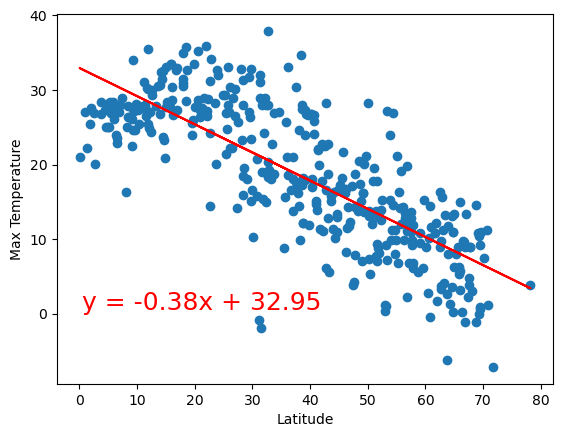

In [49]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(0.5,0.5), color="red", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.8106596053240167


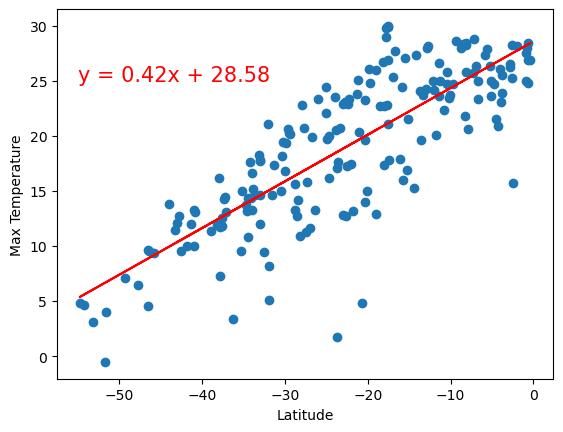

In [53]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(-55,25), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0025026617518609275


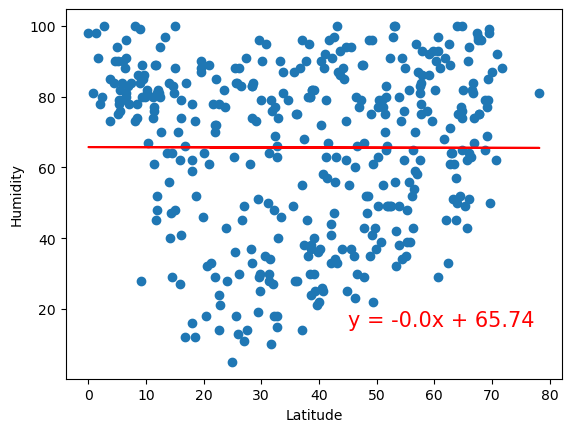

In [56]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(45,15), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.08156986476399675


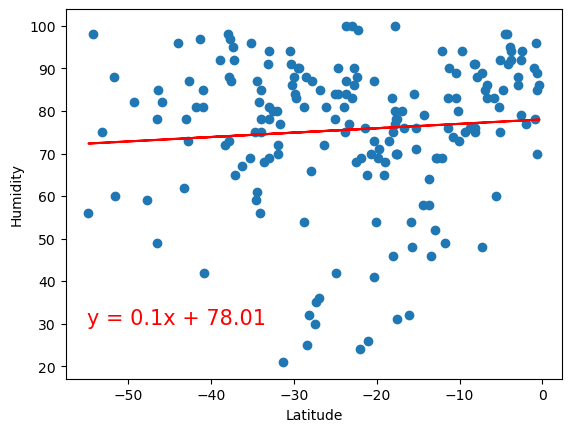

In [58]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(-55,30), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.002852573324291325


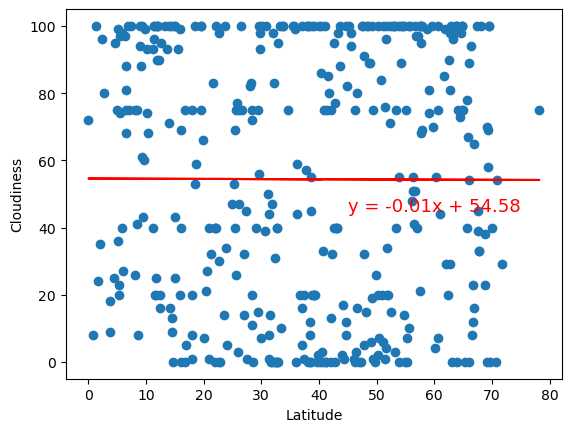

In [61]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(45,45), color="red", fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: -0.14217959265863492


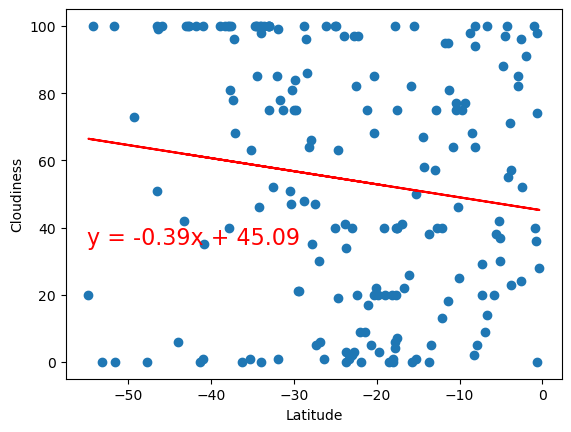

In [64]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(-55,35), color="red", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.012640889440893803


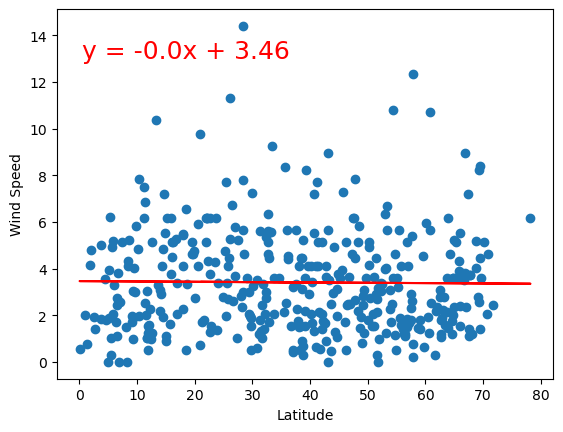

In [66]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(0.5,13), color="red", fontsize=18)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: -0.037541489680174296


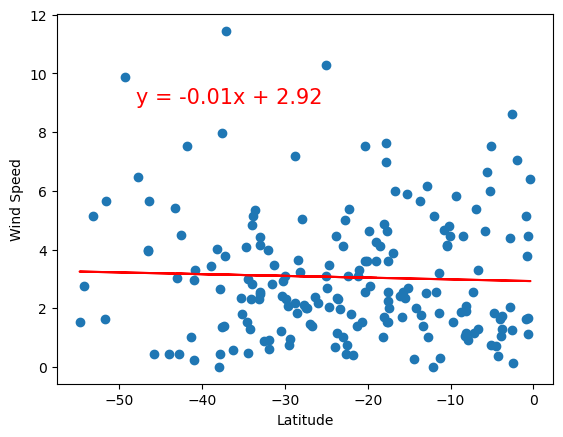

In [68]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_equation,(-48,9), color="red", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE